In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import iglob

In [2]:
from src.pipeline import get_all_data

In [3]:
data = pd.read_csv('data/all_years.csv', low_memory=False)
# data = get_all_data('data/raw/')

In [7]:
# data = data[data['loan_status'].apply(lambda x: x in ['Fully Paid', 'Charged Off'])]

In [9]:
# data.to_csv('data/all_years.csv')

In [3]:
data = data.drop('Unnamed: 0', axis=1)

In [5]:
data['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Charged Off',
       'In Grace Period', 'Late (16-30 days)', 'Default', 'Issued'],
      dtype=object)

### Get data for all years

In [ ]:
from src.pipeline import get_all_data

In [2]:
# Running this cell will create a combined csv with data from all years

in_path = 'data/raw/'
out_path = 'data/all_years.csv'
get_all_data(in_path, out_path)

In [14]:
# Create a sample dataset to make initial models simpler

# data.sample(100000).to_csv('data/all_years_sample.csv')

In [20]:
data.shape

(100000, 126)

In [10]:
# missing_cols = set()
# for i in range(len(dfs)):
#     for c in set(dfs[i].columns):
#         if c not in cols:
#             missing_cols.add(c)

### Exploration

In [14]:
import pickle

In [10]:
# Select useable columns:
X_joint = ['application_type',
           'annual_inc_joint',
           'dti_joint',
           'verification_status_joint',
           'revol_bal_joint',
           'sec_app_fico_range_low',
           'sec_app_fico_range_low', 
           'sec_app_fico_range_high',
           'sec_app_earliest_cr_line',
           'sec_app_inq_last_6mths',
           'sec_app_mort_acc ',
           'sec_app_open_acc',
           'sec_app_revol_util',
           'sec_app_num_rev_accts',
           'sec_app_chargeoff_within_12_mths',
           'sec_app_collections_12_mths_ex_med',
           'sec_app_mths_since_last_major_derog']
             
X_columns = ['loan_amnt', 
             'term', 
             'int_rate', 
             'installment', 
             'emp_length',
             'home_ownership',
             'annual_inc',
             'dti',
             'delinq_2yrs',
             'earliest_cr_line',
             'inq_last_6mths',
             'mths_since_last_delinq',
             'mths_since_last_record',
             'open_acc',
             'pub_rec',
             'revol_bal',
             'revol_util',
             'total_acc',
             'collections_12_mths_ex_med',
             'mths_since_last_major_derog',
             'acc_now_delinq',
             'tot_coll_amt',
             'il_util',
             'open_rv_12m',
             'open_rv_24m',
             'max_bal_bc',
             'all_util',
             'total_rev_hi_lim',
             'inq_fi', 
             'total_cu_tl',
             'inq_last_12m',
             'acc_open_past_24mths',
             'avg_cur_bal',
             'bc_open_to_buy',
             'bc_util',
             'chargeoff_within_12_mths',
             'delinq_amnt',
             'mo_sin_old_il_acct',
             'mo_sin_old_rev_tl_op',
             'mo_sin_rcnt_rev_tl_op',
             'mo_sin_rcnt_tl',
             'mort_acc',
             'mths_since_recent_bc',
             'mths_since_recent_bc_dlq',
             'mths_since_recent_inq',
             'mths_since_recent_revol_delinq',
             'num_accts_ever_120_pd',
             'num_actv_bc_tl',
             'num_actv_rev_tl',
             'num_bc_sats',
             'num_bc_tl',
             'num_il_tl',
             'num_op_rev_tl',
             'num_rev_accts',
             'num_rev_tl_bal_gt_0',
             'num_sats',
             'num_tl_120dpd_2m', #may be leakage
             'num_tl_30dpd', #may be leakage
             'num_tl_90g_dpd_24m',
             'num_tl_op_past_12m',
             'pct_tl_nvr_dlq',
             'percent_bc_gt_75',
             'pub_rec_bankruptcies',
             'tax_liens',
             'tot_hi_cred_lim',
             'total_bal_ex_mort',
             'total_bc_limit',
             'total_il_high_credit_limit']

target = ['loan_status']

# TODO: emp_title?
#       verification_status?
#       zip? addr_state?
#      fico?
#      last_credit_pull_d. <--- important to see if using old credit report
#.     application_type <--- may need to be split for ind vs joint

col_leak = ['funded_amnt_inv', 'int_rate', 'grade', 'sub_grade', 'issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv']


In [68]:
# Create X with chosen columns

X = data[X_columns]

In [12]:
X.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'nu

In [16]:
from src.pipeline import drop_columns_with_missing

In [69]:
# Drop columns with too much missing data

X = drop_columns_with_missing(X, 0.2)

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683690 entries, 52 to 103532
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   683690 non-null  int64  
 1   term                        683690 non-null  object 
 2   int_rate                    683690 non-null  object 
 3   installment                 683690 non-null  float64
 4   emp_length                  647052 non-null  object 
 5   home_ownership              683690 non-null  object 
 6   annual_inc                  683690 non-null  float64
 7   dti                         683527 non-null  float64
 8   delinq_2yrs                 683690 non-null  int64  
 9   earliest_cr_line            683690 non-null  object 
 10  inq_last_6mths              683689 non-null  float64
 11  open_acc                    683690 non-null  int64  
 12  pub_rec                     683690 non-null  int64  
 13  revol_bal    

In [66]:
import re

In [67]:
def convert_pct(x):
    """
    Converts string with % to a float, handles 'None's.
    """
    if x is None or pd.isnull(x):
        return None

    return float(re.sub('%', '', x))

In [72]:
X['revol_util'] = X['revol_util'].apply(convert_pct)
X['int_rate'] = X['int_rate'].apply(convert_pct)

In [73]:
# For now, drop columns that need to be converted to float
to_clean = ['int_rate', 'earliest_cr_line', 'emp_length']

X = X.drop(to_clean, axis=1)

In [74]:
# For now, drop all rows with missing data
X = X.dropna()

In [75]:
X

,loan_amnt,term,installment,home_ownership,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
52,40000,60 months,975.71,MORTGAGE,45000.0,50.53,0,0.0,18,0,...,0.0,4.0,100.0,42.9,0,0,344802.0,161720.0,45700.0,167965.0
77,8425,36 months,345.18,MORTGAGE,450000.0,12.37,0,0.0,21,0,...,0.0,2.0,100.0,50.0,0,0,768304.0,189194.0,45800.0,189054.0
98,20000,36 months,622.68,MORTGAGE,100000.0,18.92,0,0.0,9,0,...,0.0,1.0,94.7,20.0,0,0,622183.0,71569.0,85100.0,74833.0
126,4500,36 months,147.99,RENT,38500.0,4.64,0,0.0,12,0,...,0.0,4.0,91.7,0.0,0,0,53795.0,29137.0,15100.0,24595.0
147,30000,36 months,1151.16,MORTGAGE,100000.0,30.46,0,0.0,11,1,...,0.0,2.0,89.5,33.3,1,0,527120.0,98453.0,28600.0,101984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103496,5000,36 months,189.64,RENT,43000.0,1.40,1,1.0,4,0,...,1.0,0.0,94.1,0.0,0,0,64546.0,60559.0,4000.0,59646.0
103520,32000,60 months,744.42,MORTGAGE,125000.0,29.89,1,2.0,15,0,...,0.0,2.0,97.3,25.0,0,0,557391.0,138125.0,94600.0,124725.0
103527,40000,60 months,964.03,MORTGAGE,220000.0,10.88,0,2.0,19,0,...,0.0,3.0,100.0,0.0,0,0,558214.0,73480.0,141000.0,35551.0
103531,15000,36 months,487.47,MORTGAGE,60000.0,26.40,0,0.0,24,0,...,0.0,2.0,100.0,50.0,0,0,297396.0,48654.0,78700.0,0.0


In [79]:
y = data[target].iloc[X.index]
y = y['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [43]:
y.shape

(528034,)

<AxesSubplot:>

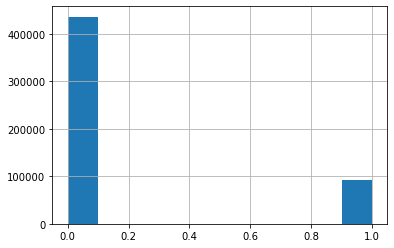

In [45]:
y.hist()

In [46]:
X.corr()

,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.952570,0.301789,0.017180,-0.004356,-0.014929,0.166559,-0.074243,0.308060,0.191422,...,-0.018276,-0.022040,0.087428,0.015453,-0.100498,0.002535,0.322094,0.257013,0.356378,0.181760
installment,0.952570,1.000000,0.295175,0.018576,0.006290,0.011220,0.156381,-0.063336,0.297950,0.169957,...,-0.012169,-0.005459,0.069298,0.039129,-0.092896,0.009276,0.289918,0.243313,0.322529,0.168219
annual_inc,0.301789,0.295175,1.000000,-0.183521,0.042276,0.028995,0.113390,-0.011555,0.284207,0.165039,...,0.010223,0.044616,-0.009067,-0.028217,-0.046588,0.032751,0.419652,0.312560,0.270682,0.258456
dti,0.017180,0.018576,-0.183521,1.000000,-0.020335,-0.016577,0.236997,-0.050651,0.113222,0.164958,...,-0.021563,0.072155,0.091966,0.150710,-0.041289,-0.026042,-0.010381,0.255180,0.012967,0.291622
delinq_2yrs,-0.004356,0.006290,0.042276,-0.020335,1.000000,0.019210,0.041326,-0.026808,-0.032424,0.108505,...,0.632129,-0.039610,-0.449467,-0.007603,-0.057739,0.013924,0.055201,0.025627,-0.076726,0.054527
inq_last_6mths,-0.014929,0.011220,0.028995,-0.016577,0.019210,1.000000,0.114534,0.045942,-0.013049,0.130297,...,0.016778,0.254373,-0.010831,-0.061452,0.053010,0.010579,0.017197,0.029405,-0.001006,0.034773
open_acc,0.166559,0.156381,0.113390,0.236997,0.041326,0.114534,1.000000,-0.025562,0.208268,0.678475,...,0.007205,0.343680,0.110776,-0.097099,-0.026613,-0.007914,0.255056,0.379282,0.342285,0.344192
pub_rec,-0.074243,-0.063336,-0.011555,-0.050651,-0.026808,0.045942,-0.025562,1.000000,-0.100660,0.001502,...,-0.010119,0.067853,-0.007147,-0.046320,0.676314,0.684475,-0.080194,-0.059988,-0.135811,-0.023012
revol_bal,0.308060,0.297950,0.284207,0.113222,-0.032424,-0.013049,0.208268,-0.100660,1.000000,0.181008,...,-0.034329,-0.029613,0.121907,0.126513,-0.122374,-0.013400,0.449768,0.517659,0.465084,0.115226
total_acc,0.191422,0.169957,0.165039,0.164958,0.108505,0.130297,0.678475,0.001502,0.181008,1.000000,...,0.062413,0.308039,0.029414,-0.077271,0.026710,-0.018698,0.314095,0.413334,0.268466,0.399726


## Modeling

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import recall_score, precision_score

In [77]:
X = X.drop(['term', 'home_ownership' ], axis=1)

In [88]:
from src.model import create_model

In [91]:
model = RandomForestClassifier()
model, accuracy, recall, precision = create_model(model, X, y)
print(f'Accuracy: {accuracy}\nRecall: {recall}\nPrecision: {precision}')

Accuracy: 0.8241547214050936
Recall: 4.089979550102249e-05
Precision: 1.0


In [92]:
model = GradientBoostingClassifier()
model, accuracy, recall, precision = create_model(model, X, y)
print(f'Accuracy: {accuracy}\nRecall: {recall}\nPrecision: {precision}')

Accuracy: 0.8241043750943994
Recall: 0.0
Precision: 0.0


In [96]:
y_hat = model.predict(X_test)

In [98]:
y.sum()

97267

In [97]:
y_hat.sum()

3

In [87]:
1-y_test.sum()/y_test.shape[0]

0.8245143379100527

In [95]:
X.loc[0]

loan_amnt                      10400.00
installment                      321.08
annual_inc                     58000.00
dti                               14.92
delinq_2yrs                        0.00
inq_last_6mths                     2.00
open_acc                          17.00
pub_rec                            0.00
revol_bal                       6133.00
revol_util                        31.60
total_acc                         36.00
collections_12_mths_ex_med         0.00
acc_now_delinq                     0.00
tot_coll_amt                       0.00
total_rev_hi_lim               19400.00
acc_open_past_24mths               7.00
avg_cur_bal                     9536.00
bc_open_to_buy                  7599.00
bc_util                           41.50
chargeoff_within_12_mths           0.00
delinq_amnt                        0.00
mo_sin_old_il_acct                76.00
mo_sin_old_rev_tl_op             290.00
mo_sin_rcnt_rev_tl_op              1.00
mo_sin_rcnt_tl                     1.00
